In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import sys
import numpy as np 
import pickle
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


In [2]:
sys.path.append("/work/NLP/src")
from data.dataloaders.logreg_loader import LogRegDataLoader
logreg_loader = LogRegDataLoader()
from evaluate import ModelEvaluator


/work/NLP/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-13 12:29:09.414153: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 12:29:09.424460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739446149.436117   20668 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739446149.439702   20668 cuda_blas.cc:1418] Unable to regi

In [16]:
base_dir = Path("/work/NLP/data/processed")
dataset_types = ["unprocessed", "processed"]
splits = ["train", "test", "val"]
data = {}

for dataset_type in dataset_types:
    for split in splits:
        X_key = f"X_{split}_{dataset_type}"
        y_key = f"y_{split}_{dataset_type}"
        
        data[X_key] = pd.read_csv(base_dir / f"{X_key}.csv")
        data[y_key] = pd.read_csv(base_dir / f"{y_key}.csv")

        if isinstance(data[X_key], pd.DataFrame):
            data[X_key] = data[X_key].squeeze().tolist()

X_train_unprocessed, X_test_unprocessed, X_val_unprocessed = (
    data["X_train_unprocessed"], data["X_test_unprocessed"], data["X_val_unprocessed"]
)
y_train_unprocessed, y_test_unprocessed, y_val_unprocessed = (
    data["y_train_unprocessed"], data["y_test_unprocessed"], data["y_val_unprocessed"]
)
X_train_processed, X_test_processed, X_val_processed = (
    data["X_train_processed"], data["X_test_processed"], data["X_val_processed"]
)
y_train_processed, y_test_processed, y_val_processed = (
    data["y_train_processed"], data["y_test_processed"], data["y_val_processed"]
)



# Baseline Model: Logistic Regression

## Data Loader

In [6]:

X_train_processed, X_val_processed, X_test_processed = logreg_loader.vectorize(
    X_train_processed, X_val_processed, X_test_processed
)

print("X_train_processed shape:", X_train_processed.shape)
print("X_val_processed shape:", X_val_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)


X_train_processed shape: (27810, 5000)
X_val_processed shape: (3968, 5000)
X_test_processed shape: (7948, 5000)


In [7]:
X_train_unprocessed, X_val_unprocessed, X_test_unprocessed = logreg_loader.vectorize(
    X_train_unprocessed, X_val_unprocessed, X_test_unprocessed
)

print("X_train_unprocessed shape:", X_train_unprocessed.shape)
print("X_val_unprocessed shape:", X_val_unprocessed.shape)
print("X_test_unprocessed shape:", X_test_unprocessed.shape)

X_train_unprocessed shape: (27850, 5000)
X_val_unprocessed shape: (3975, 5000)
X_test_unprocessed shape: (7961, 5000)


## Model

In [8]:
logreg = LogisticRegression(max_iter=2000)  

### Logisitic Regression - Processed Lyrics 

In [9]:

logreg.fit(X_train_processed, y_train_processed)

y_pred_test_processed = logreg.predict(X_test_processed)

/work/NLP/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


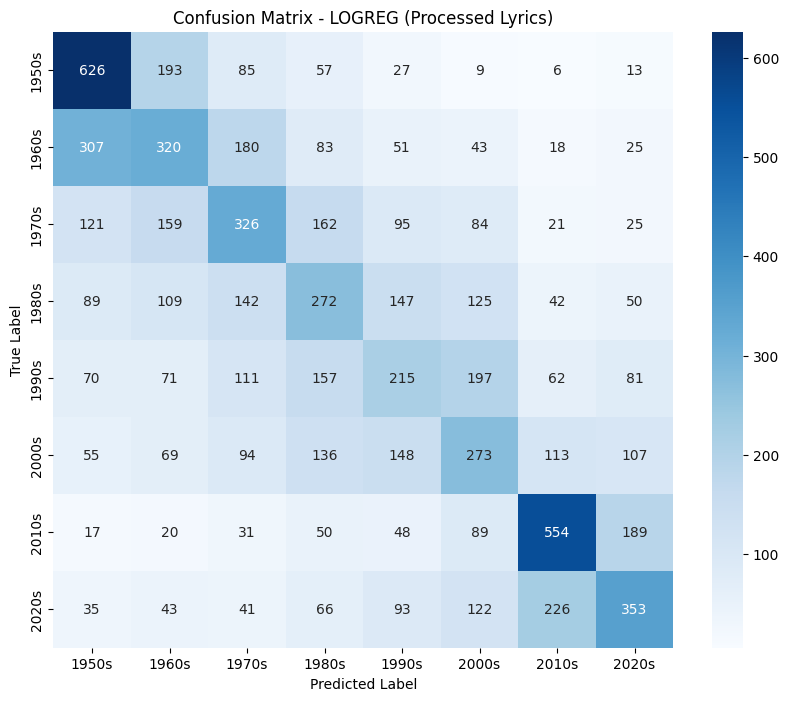

In [11]:

target_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
target_names = [name + 's' for name in target_names]

label_to_decade = {i: name for i, name in enumerate(target_names)}

if isinstance(y_test_processed, pd.DataFrame):
    y_test_processed = y_test_processed['decade'].values.ravel()

if isinstance(y_pred_test_processed, pd.DataFrame):
    y_pred_test_processed = y_pred_test_processed['decade'].values.ravel()

y_test_decade = np.array([label_to_decade[label] for label in y_test_processed])
y_pred_decade = np.array([label_to_decade[label] for label in y_pred_test_processed])

evaluator_processed = ModelEvaluator(
    y_test_decade, 
    y_pred_decade, 
    target_names, 
    report_type="processed", 
    model_name="logreg"
)
evaluator_processed.evaluate()


### Log Regression - Unprocessed Lyrics 

In [13]:

logreg.fit(X_train_unprocessed, y_train_unprocessed)

y_pred_test_unprocessed = logreg.predict(X_test_unprocessed)

/work/NLP/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


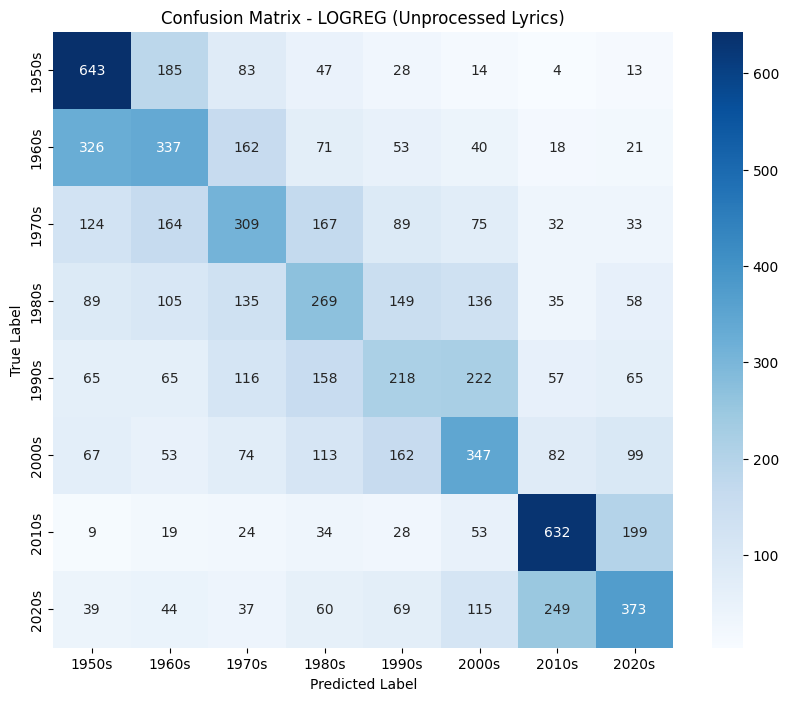

In [14]:
if isinstance(y_test_unprocessed, pd.DataFrame):
    y_test_unprocessed = y_test_unprocessed['decade'].values.ravel()

if isinstance(y_pred_test_unprocessed, pd.DataFrame):
    y_pred_test_unprocessed = y_pred_test_unprocessed['decade'].values.ravel()

y_test_decade_unprocessed = np.array([label_to_decade[label] for label in y_test_unprocessed])
y_pred_decade_unprocessed = np.array([label_to_decade[label] for label in y_pred_test_unprocessed])

evaluator_unprocessed = ModelEvaluator(
    y_test_decade_unprocessed, 
    y_pred_decade_unprocessed, 
    target_names, 
    report_type="unprocessed", 
    model_name="logreg"
)
evaluator_unprocessed.evaluate()
